# **Squats Counter Using Mediapipe and OpenCV**

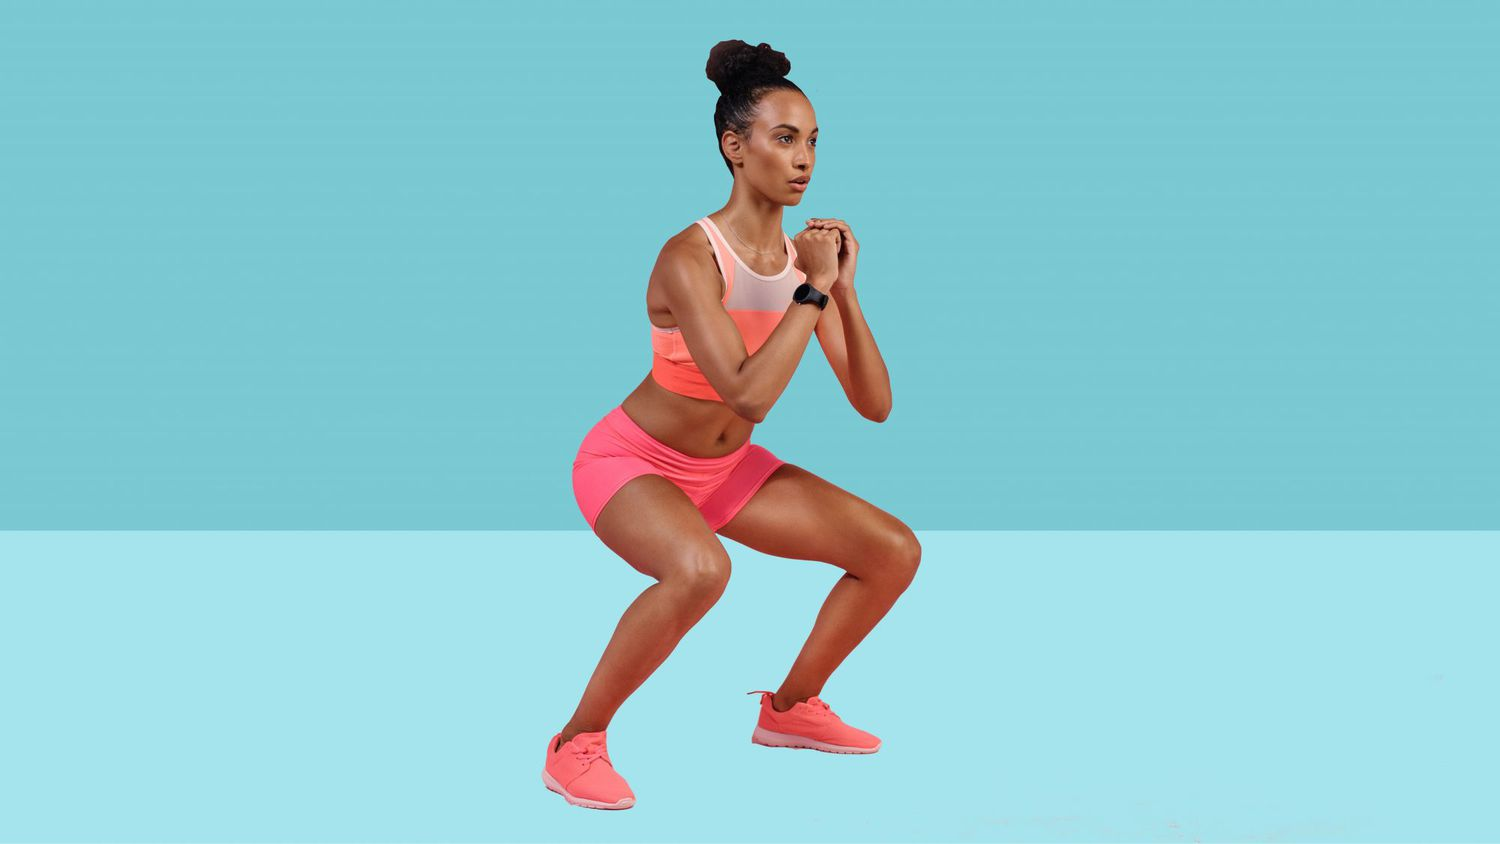

# Installing Mediapipe and Opencv

In [1]:
!pip install mediapipe opencv-python


# Importing the libraries

In [3]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Taking in Video Inputs

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    try:
        ret, frame = cap.read()
        cv2.imshow('Mediapipe Feed', frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    except Exception as e:
        print(f"Camera error: {str(e)}")
        cap.release()
        cap = cv2.VideoCapture(0)

cap.release()
cv2.destroyAllWindows()

# Locating the Joints & Extracting co-ordinates

In [4]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
#Detection confidence = 0.5
#Tracking confidence = 0.5

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
  while True:
      try:
          ret, frame = cap.read()

          # Recolor image to RGB
          image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
          image.flags.writeable = False

        # Make detection
          results = pose.process(image)

        # Recolor back to BGR
          image.flags.writeable = True
          image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extracting landmarks
          try:
              landmarks = results.pose_landmarks.landmark
              print(landmarks)
          except:
              pass


        # Render detections
          mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
          )

  #show the image
          cv2.imshow('Mediapipe Feed', image)

          if cv2.waitKey(10) & 0xFF == ord('q'):
            break
      except Exception as e:
          print(f"Camera error: {str(e)}")
          cap.release()
          cap = cv2.VideoCapture(0)

  cap.release()
  cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Streaming output truncated to the last 5000 lines.
z: -0.17727455496788025
visibility: 0.2581622302532196
, x: 0.491693913936615
y: 0.5902738571166992
z: -0.08588452637195587
visibility: 0.08454283326864243
, x: 0.5734999775886536
y: 0.9131872653961182
z: -0.03795445337891579
visibility: 0.19252684712409973
, x: 0.5299689173698425
y: 0.6502619981765747
z: 0.07898920774459839
visibility: 0.138137549161911
, x: 0.5737939476966858
y: 0.9578154683113098
z: -0.045293696224689484
visibility: 0.24762430787086487
, x: 0.5275996923446655
y: 0.6661951541900635
z: 0.08191007375717163
visibility: 0.19136901199817657
, x: 0.5607343316078186
y: 0.9388391971588135
z: -0.061168182641267776
visibility: 0.2872679829597473
, x: 0.5425686836242676
y: 0.6781625747680664
z: 0.06290403008460999
visibility: 0.2131877988576889
, x: 0.5568000078201294
y: 0.9183444380760193
z: -0.04147467762231827
visibility: 0.2374386042356491
, x: 0.5458237528800964
y: 0.6691174507141113
z: 0.07616392523050308
visibility: 0.18

# Body Landmarks

In [5]:
print("The body has", len(landmarks), "landmarks:")
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

The body has 33 landmarks:
PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


**For this project, the interest is in the squat exrcise so we would be focusing on the co-ordinate positions of the hip, knee and ankle**

In [6]:
print(mp_pose.PoseLandmark.LEFT_HIP.value)
print(mp_pose.PoseLandmark.LEFT_KNEE.value)
print(mp_pose.PoseLandmark.LEFT_ANKLE.value)

23
25
27


# A function that calculates angle between the hip, knee and ankle

In [7]:
#define a function to calculate angles between joints
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle >180.0:
        angle = 360-angle

    return angle

**Extracting the co-rodinates for hip, knee and ankle**

In [8]:
hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

hip, knee, ankle

([0.5288091897964478, 0.39032623171806335],
 [0.5603544116020203, 0.5735561847686768],
 [0.6044332385063171, 0.538774311542511])

# Angle Detection

In [9]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
#Detection confidence = 0.5
#Tracking confidence = 0.5

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:


  while True:
    try:
      ret, frame = cap.read()

          # Recolor image to RGB
      image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      image.flags.writeable = False

        # Make detection
      results = pose.process(image)

        # Recolor back to BGR
      image.flags.writeable = True
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
      try:
        landmarks = results.pose_landmarks.landmark

            # Get coordinates
        shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
        wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            # Calculate angle
        angle = calculate_angle(hip, knee, ankle)

            # Visualize angle
        cv2.putText(image, str(angle),
                           tuple(np.multiply(elbow, [640, 480]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )

      except:
        pass


        # Render detections
      mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )

  #show the image
      cv2.imshow('Mediapipe Feed', image)

      if cv2.waitKey(10) & 0xFF == ord('q'):
        break

    except Exception as e:
      print(f"Camera error: {str(e)}")
      cap.release()
      cap = cv2.VideoCapture(0)

  cap.release()
  cv2.destroyAllWindows()

# Curl counter

In [11]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
#Detection confidence = 0.5
#Tracking confidence = 0.5

# Curl counter variables
counter = 0
stage = None

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:


  while True:
    try:
      ret, frame = cap.read()

          # Recolor image to RGB
      image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      image.flags.writeable = False

        # Make detection
      results = pose.process(image)

        # Recolor back to BGR
      image.flags.writeable = True
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
      try:
        landmarks = results.pose_landmarks.landmark

        hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            # Calculate angle
        angle = calculate_angle(hip, knee, ankle)

            # Visualize angle
        cv2.putText(image, str(angle),
                           tuple(np.multiply(knee, [640, 480]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )

             # Curl counter logic for basic squat
        if angle < 90:
            stage = "down"
        if angle > 150 and stage =='down':
            stage="up"
            counter +=1
            print(counter)

      except:
        pass


        # Render detections
      mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )

             # Render curl counter
        # Setup status box
      cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)

      # Rep data
      cv2.putText(image, 'REPS', (15,12),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
      cv2.putText(image, str(counter),
                  (10,60),
                  cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

      # Stage data
      cv2.putText(image, 'STAGE', (65,12),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
      cv2.putText(image, stage,
                  (60,60),
                  cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)


  #show the image
      cv2.imshow('Mediapipe Feed', image)

      if cv2.waitKey(10) & 0xFF == ord('q'):
        break

    except Exception as e:
      print(f"Camera error: {str(e)}")
      cap.release()
      cap = cv2.VideoCapture(0)

  cap.release()
  cv2.destroyAllWindows()